In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/andrew/Downloads/titanic.csv')

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df['Survived'].sum()

342

In [29]:
#df['Sex'] = df['Sex'].map({'male':0,'female':1})

#df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

dum = pd.get_dummies(df['Embarked'], prefix = 'emb',drop_first=True)

In [30]:
df = df.drop(columns=['Embarked']).join(dum)

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,False,False


In [32]:
df.drop(columns=['Ticket','Cabin'],inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,emb_Q,emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,False,True


In [34]:
dum_g = pd.get_dummies(df['Sex'],prefix='gender',drop_first=True)

In [35]:
dum_g

,gender_male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [36]:
df = df.drop(columns=['Sex']).join(dum_g)

In [37]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,emb_Q,emb_S,gender_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,False,False,False


In [41]:
df.drop(columns=['Name'],inplace=True)

In [42]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,emb_Q,emb_S,gender_male
0,1,0,3,22.0,1,0,7.2500,False,True,True
1,2,1,1,38.0,1,0,71.2833,False,False,False


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
emb_Q            0
emb_S            0
gender_male      0
dtype: int64

In [43]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
emb_Q          0.003650
emb_S         -0.155660
gender_male   -0.543351
Name: Survived, dtype: float64

In [139]:
df.corr()['Age'].sort_values().drop('Age')

Pclass        -0.403858
SibSp         -0.243452
Parch         -0.175799
emb_Q         -0.070315
Survived      -0.050504
emb_S         -0.000483
PassengerId    0.035256
gender_male    0.080464
Fare           0.120886
Name: Age, dtype: float64

In [142]:
df['Fare'].nunique()

248

<Axes: >

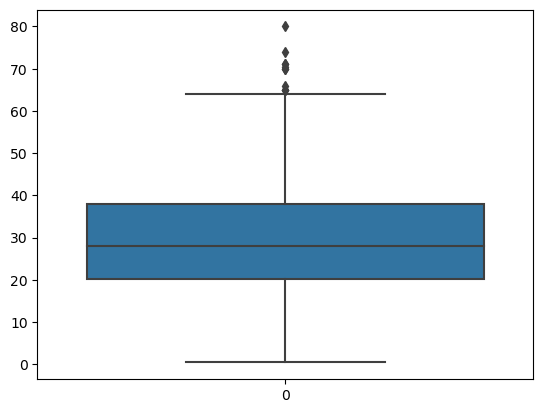

In [53]:
sns.boxplot(df['Age'])

In [48]:
df['Pclass'].nunique()

3

In [52]:
df.groupby('Pclass').count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [58]:
age_ = df.groupby('Pclass').mean()['Age']

In [59]:
age_

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [60]:
age_[1]

38.233440860215055

In [50]:
df['Age'].mean()

29.69911764705882

In [68]:
def age_fill(df):
    AGE = []
    for i in range(0, len(df)):
        if np.isnan(df['Age'][i]):
            age = age_[df['Pclass'][i]]
        else:
            age = df['Age'][i]
        AGE.append(age)
    return AGE

In [71]:
df['Age'] = age_fill(df)

In [72]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
emb_Q          0
emb_S          0
gender_male    0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

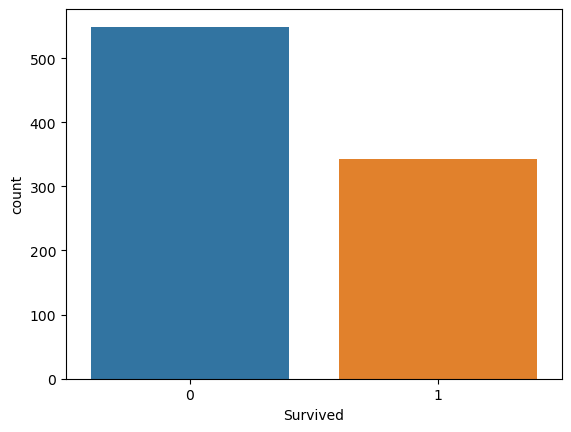

In [118]:
sns.countplot(x='Survived',data=df)

In [119]:
len(df)

891

In [129]:
survived_0 = int(df[df['Survived']==0].groupby('Survived').count()['PassengerId'])

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_57491/1153648910.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  survived_0 = int(df[df['Survived']==0].groupby('Survived').count()['PassengerId'])


In [130]:
survived_0 / len(df)

0.6161616161616161

In [73]:
X = df.drop(columns=['PassengerId','Survived'])
y = df['Survived']

In [102]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=101)

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [104]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [105]:
X_train.shape

(668, 8)

In [106]:
X_test.shape

(223, 8)

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [132]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [133]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600


2023-08-30 17:54:11.580650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 25ms/step - loss: 0.6514 - val_loss: 0.6369
Epoch 2/600
 9/21 [===========>..................] - ETA: 0s - loss: 0.6016

2023-08-30 17:54:12.336933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 9ms/step - loss: 0.6018 - val_loss: 0.6088
Epoch 3/600
21/21 [==============================] - 0s 7ms/step - loss: 0.5599 - val_loss: 0.5742
Epoch 4/600
21/21 [==============================] - 0s 8ms/step - loss: 0.5213 - val_loss: 0.5511
Epoch 5/600
21/21 [==============================] - 0s 9ms/step - loss: 0.5089 - val_loss: 0.5361
Epoch 6/600
21/21 [==============================] - 0s 8ms/step - loss: 0.4889 - val_loss: 0.5280
Epoch 7/600
21/21 [==============================] - 0s 8ms/step - loss: 0.4839 - val_loss: 0.5167
Epoch 8/600
21/21 [==============================] - 0s 7ms/step - loss: 0.4584 - val_loss: 0.5077
Epoch 9/600
21/21 [==============================] - 0s 8ms/step - loss: 0.4587 - val_loss: 0.5123
Epoch 10/600
21/21 [==============================] - 0s 8ms/step - loss: 0.4681 - val_loss: 0.4912
Epoch 11/600
21/21 [==============================] - 0s 8ms/step - loss: 0.4552 - val_loss: 0.5015
Epoch 12/600
21/21 [

21/21 [==============================] - 0s 7ms/step - loss: 0.3702 - val_loss: 0.4479
Epoch 85/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3844 - val_loss: 0.4516
Epoch 86/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3818 - val_loss: 0.4568
Epoch 87/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3860 - val_loss: 0.4489
Epoch 88/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3695 - val_loss: 0.4535
Epoch 89/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3807 - val_loss: 0.4509
Epoch 90/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3747 - val_loss: 0.4486
Epoch 91/600
21/21 [==============================] - 0s 8ms/step - loss: 0.3885 - val_loss: 0.4509
Epoch 92/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3712 - val_loss: 0.4479
Epoch 93/600
21/21 [==============================] - 0s 7ms/step - loss: 0.3799 - val_loss: 0.4462
Epoch 94/600


In [134]:
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ... Your model and data preparation code ...

# Fit the model with the EarlyStopping callback
# model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

In [135]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

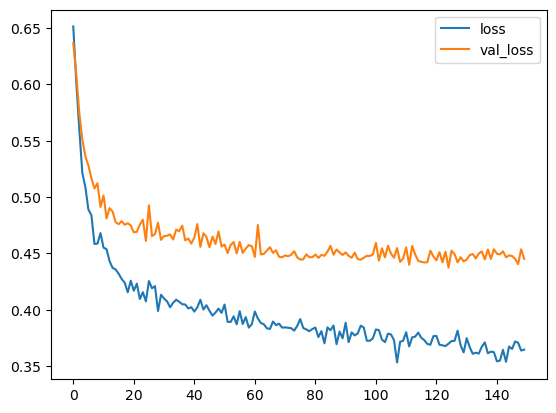

In [136]:
loss_df.plot()

In [137]:
predictions = model.predict(X_test)

predictions = np.round(predictions).astype(int)

7/7 [==============================] - 0s 6ms/step


2023-08-30 17:54:47.271152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [138]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       127
           1       0.90      0.64      0.74        96

    accuracy                           0.81       223
   macro avg       0.84      0.79      0.80       223
weighted avg       0.83      0.81      0.80       223

[[120   7]
 [ 35  61]]


In [ ]:
df_test = pd.read_csv('/Users/andrew/Downloads/titanic/test.csv')

In [ ]:
df_test.head(2)

df_test['Sex'] = df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked'] = df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
df_test.head(2)

In [ ]:
df_pred = df_test.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [ ]:
df_pred.head(2)

In [ ]:
x_pred = scaler.transform(df_pred)

In [ ]:
predictions = model.predict(x_pred)

predictions = np.round(predictions).astype(int)

In [ ]:
pred_df = pd.DataFrame(predictions,columns=['Survived'])

In [ ]:
pred_df.info()

In [ ]:
pred_df['PassengerId'] = df_test['PassengerId']

In [ ]:
pred_df.info()

In [ ]:
pred_df.to_excel('/Users/andrew/Downloads/titanic/preds_df.xlsx')